In [276]:
import pandas as pd

In [277]:
import seaborn as sns

In [278]:
# time series it's a collection of data or observations made through a sequential time that can be
# seconds, minutes, days, months, years or others

# Analysis for car sales

In [279]:
alucar = pd.read_csv('Data/alucar.csv', sep = ',')

In [280]:
alucar.head(5)

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [281]:
#checking sales over time:

In [282]:
print('Amout of rows and columns:', alucar.shape)

Amout of rows and columns: (24, 2)


In [283]:
print('Amout of null data:', alucar.isna().sum())

Amout of null data: mes       0
vendas    0
dtype: int64


In [284]:
# to sum both:

In [285]:
print('Amout of null data:', alucar.isna().sum().sum())

Amout of null data: 0


In [286]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [287]:
# to work with timeSeries we need to convert the 'mes' table of object to DateTime

In [288]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [289]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

## matplotlib import

In [290]:
%matplotlib inline

In [291]:
from matplotlib import pyplot as plt

In [292]:
# ploting using sns

<AxesSubplot:xlabel='mes', ylabel='vendas'>

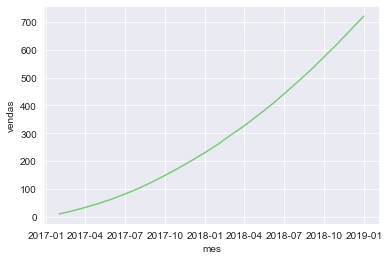

In [293]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar) 

In [294]:
# Improving the graphic

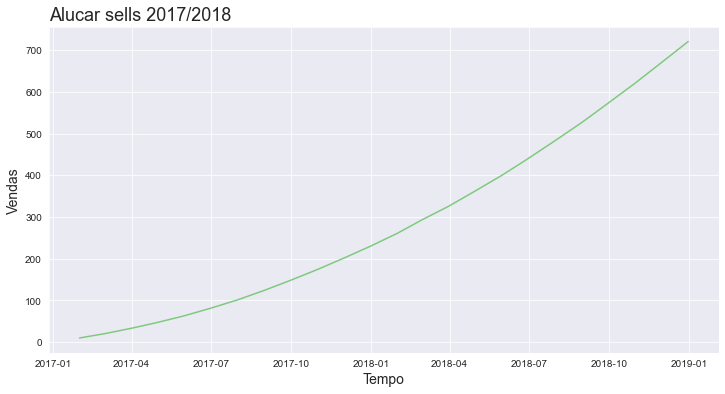

In [295]:
sns.set_palette('Accent') # to change the color of the graphic
sns.set_style('darkgrid') # grid background
ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar) 
ax.figure.set_size_inches(12,6) # to change the size
ax.set_title('Alucar sells 2017/2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas', fontsize = 14)

ax = ax #to remove the automatically generated tittle 

### to calculate the difference of salles from one month to another

In [296]:
alucar['Increase'] = alucar['vendas'].diff()

In [297]:
alucar.head(5)

,mes,vendas,Increase
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [298]:
alucar['Increase %'] = alucar['vendas'].pct_change() * 100

In [299]:
alucar.head(5)

,mes,vendas,Increase,Increase %
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,100.000000
2,2017-03-31,33,13.0,65.000000
3,2017-04-30,47,14.0,42.424242
4,2017-05-31,63,16.0,34.042553


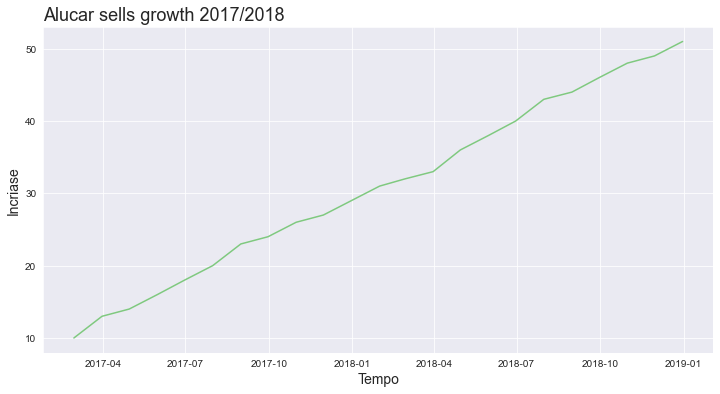

In [300]:
sns.set_palette('Accent') # to change the color of the graphic
sns.set_style('darkgrid') # grid background
ax = sns.lineplot(x = 'mes', y = 'Increase', data = alucar) 
ax.figure.set_size_inches(12,6) # to change the size
ax.set_title('Alucar sells growth 2017/2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Incriase', fontsize = 14)

ax = ax #to remove the automatically generated tittle 

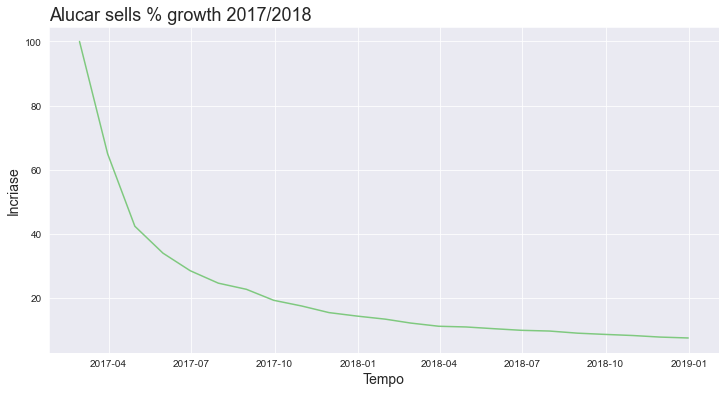

In [301]:
sns.set_palette('Accent') # to change the color of the graphic
sns.set_style('darkgrid') # grid background
ax = sns.lineplot(x = 'mes', y = 'Increase %', data = alucar) 
ax.figure.set_size_inches(12,6) # to change the size
ax.set_title('Alucar sells % growth 2017/2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Incriase', fontsize = 14)

ax = ax #to remove the automatically generated tittle 

In [302]:
# besiede the sales are always up, the % of this growing is going down with pass of time

# a better way to aways plotting graphs is using a function with the desired configuration:

def ploting(title, labelx, labely, x, y, dataset):
    sns.set_palette('Accent') # to change the color of the graphic
    sns.set_style('darkgrid') # grid background
    ax = sns.lineplot(x = x, y = y, data = dataset) 
    ax.figure.set_size_inches(12,6) # to change the size
    ax.set_title(title, loc = 'left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)

In [303]:
#importing correlation plot

In [304]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

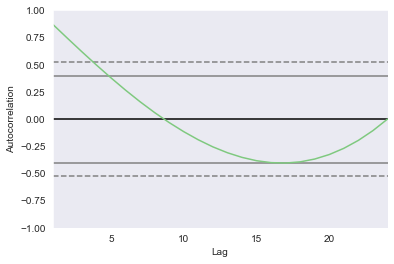

In [305]:
autocorrelation_plot(alucar['vendas'] )

In [306]:
# the correlation is the principal tool to diagnose of time series analysis 

# Checking newsletter coverage

In [307]:
newsletter = pd.read_csv('Data/newsletter_alucar.csv', sep = ',')

In [308]:
newsletter.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [309]:
type(newsletter)

pandas.core.frame.DataFrame

In [310]:
newsletter.dtypes

mes           object
assinantes     int64
dtype: object

In [311]:
# converting object to dateTime

In [312]:
print('The amout of rows and columns is:', newsletter.shape)
print('The amout of NaN is:', newsletter.isna().sum().sum())

The amout of rows and columns is: (24, 2)
The amout of NaN is: 0


In [313]:
newsletter['mes'] = pd.to_datetime(newsletter['mes'])

In [314]:
newsletter.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [315]:
# checking if the number of registered newsletters is increasing 

In [316]:
newsletter['increase'] = newsletter['assinantes'].diff()
newsletter['acceleration'] = newsletter['increase'].diff() 

In [317]:
newsletter.head()

,mes,assinantes,increase,acceleration
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


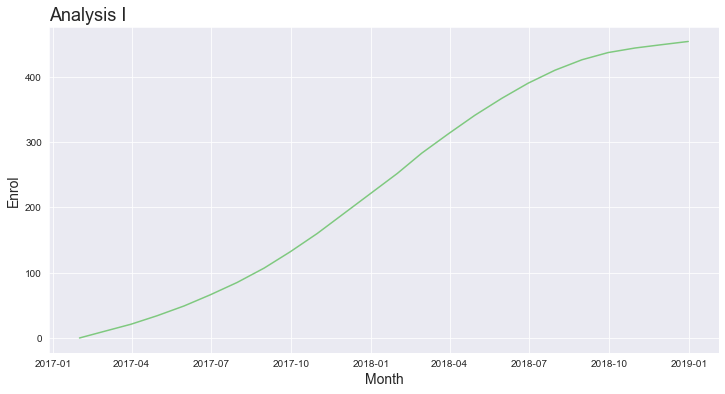

In [318]:
ay = ploting('Analysis I', 'Month', 'Enrol', 'mes', 'assinantes', newsletter)

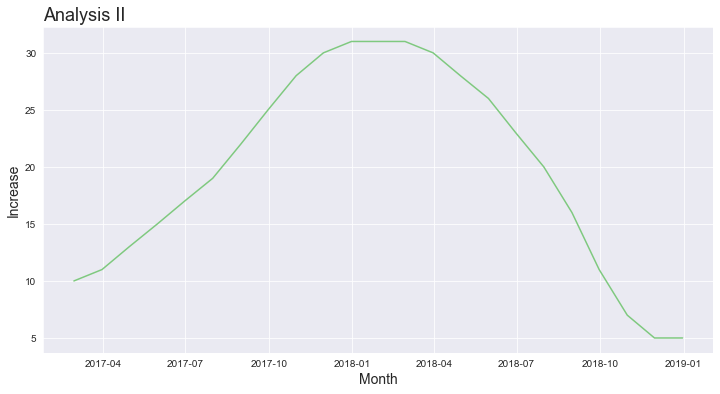

In [319]:
ay1 = ploting('Analysis II ', 'Month', 'Increase', 'mes', 'increase', newsletter)

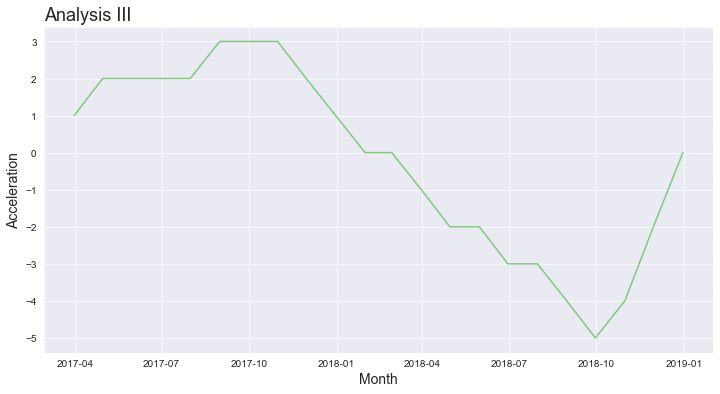

In [320]:
ay2 = ploting('Analysis III ', 'Month', 'Acceleration', 'mes', 'acceleration', newsletter)

# Analysis for Chocolura company

In [321]:
chocolura = pd.read_csv('Data/chocolura.csv', sep=',')

In [322]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [323]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [324]:
# checking for null values and count the number of rows and columns

In [325]:
chocolura.shape

(24, 2)

In [326]:
print('The number of rows and columns are:', chocolura.shape)

The number of rows and columns are: (24, 2)


In [327]:
print('The number of NaN values are:', chocolura.isna().sum().sum())

The number of NaN values are: 0


In [328]:
# converting obj to dateTime

In [329]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [330]:
chocolura['increase'] = chocolura['vendas'].diff()

In [331]:
chocolura['acceleration'] = chocolura['increase'].diff()

In [332]:
chocolura.head()

,mes,vendas,increase,acceleration
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


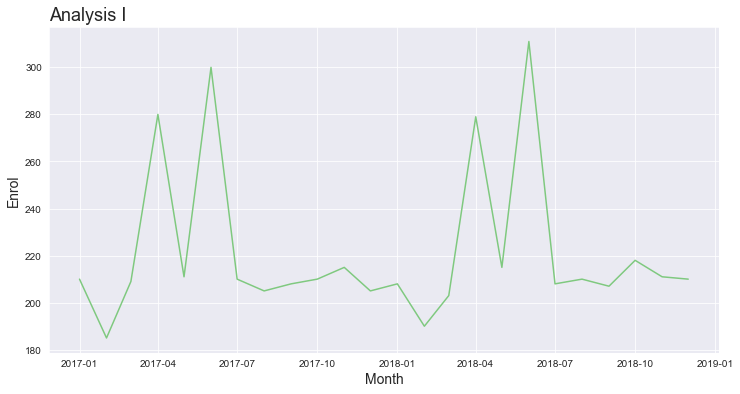

In [333]:
by = ploting('Analysis I', 'Month', 'Enrol', 'mes', 'vendas', chocolura)

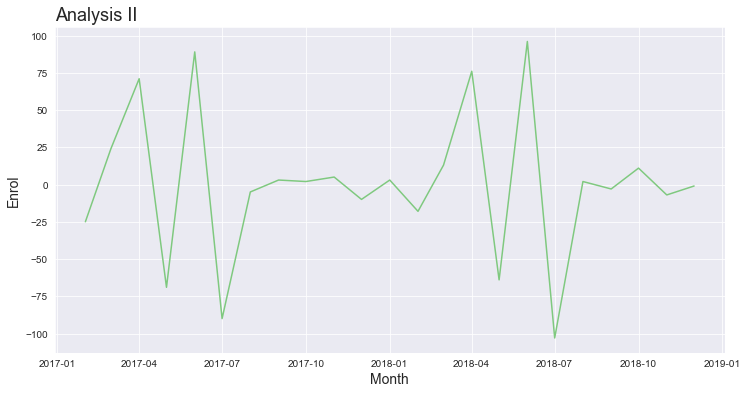

In [334]:
by1 = ploting('Analysis II', 'Month', 'Enrol', 'mes', 'increase', chocolura)

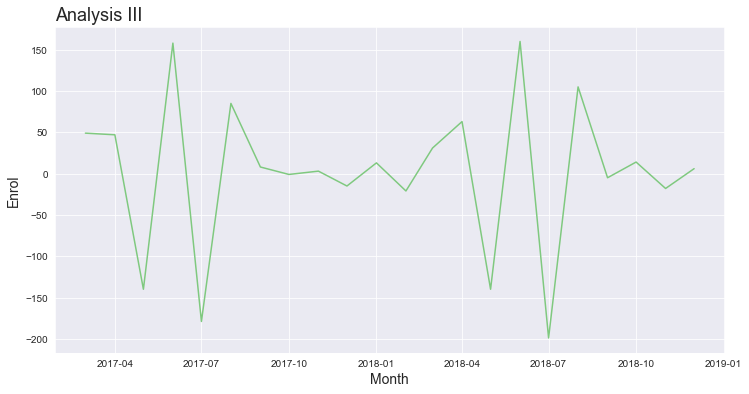

In [335]:
by2 = ploting('Analysis III', 'Month', 'Enrol', 'mes', 'acceleration', chocolura)

In [336]:
# Analyzing this graphics we can see what it's know as seasonal, as the sells incriase during the first 6 months and than go dow
# before incriase again on the same period next year

# Analyzing daily sell's

In [337]:
daily = pd.read_csv('Data/vendas_por_dia.csv', sep= ',')

In [338]:
daily.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [339]:
daily.dtypes

dia       object
vendas     int64
dtype: object

In [340]:
daily['dia'] = pd.to_datetime(daily['dia'])

In [341]:
print('Number of rows and columns are:', daily.shape)

Number of rows and columns are: (61, 2)


In [342]:
print('Number of NaN values is:', daily.isna().sum().sum())

Number of NaN values is: 0


In [343]:
daily.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [344]:
daily['increase'] = daily['vendas'].diff()

In [345]:
daily['acceleration'] = daily['increase'].diff()

In [346]:
daily.head()

,dia,vendas,increase,acceleration
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


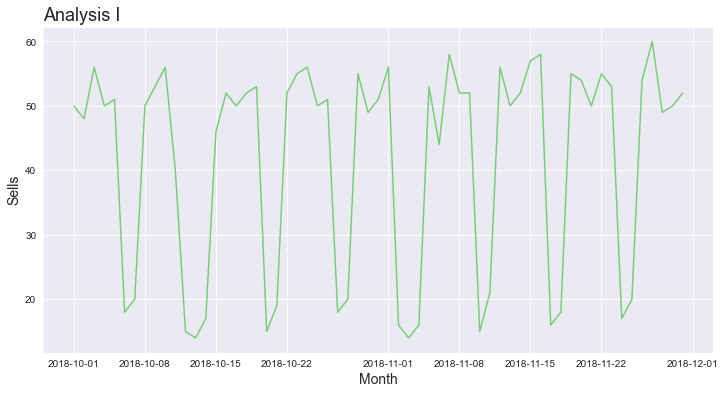

In [347]:
cy = ploting('Analysis I', 'Month', 'Sells', 'dia', 'vendas', daily)

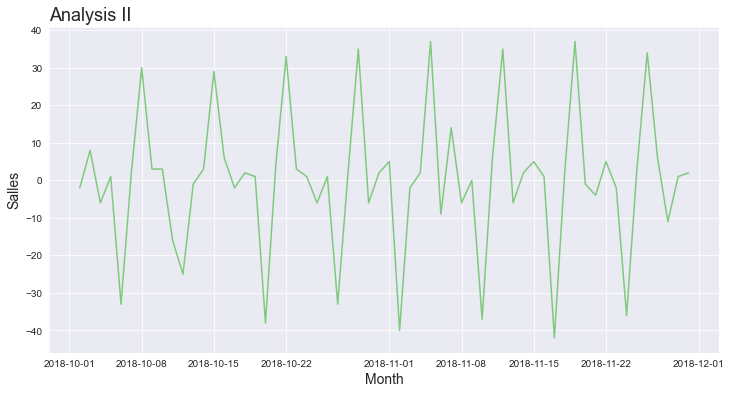

In [348]:
cy1 = ploting('Analysis II', 'Month', 'Salles', 'dia', 'increase', daily)

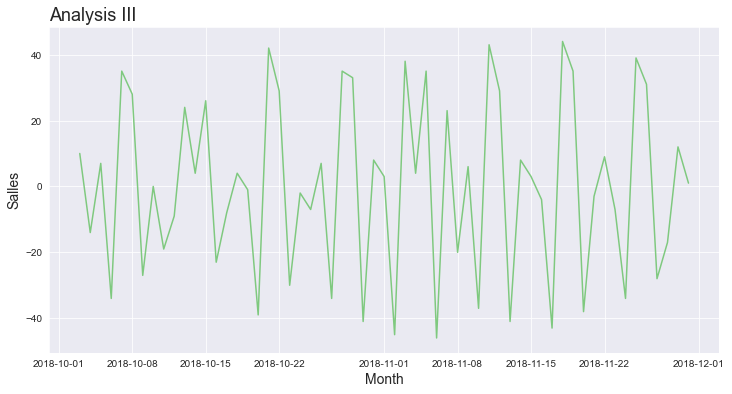

In [349]:
cy2 = ploting('Analysis III', 'Month', 'Salles', 'dia', 'acceleration', daily)

In [350]:
# Analyzing the seasonal salles:

In [351]:
daily['day_of_the_week'] = daily['dia'].dt.day_name()

In [352]:
daily.head()

,dia,vendas,increase,acceleration,day_of_the_week
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


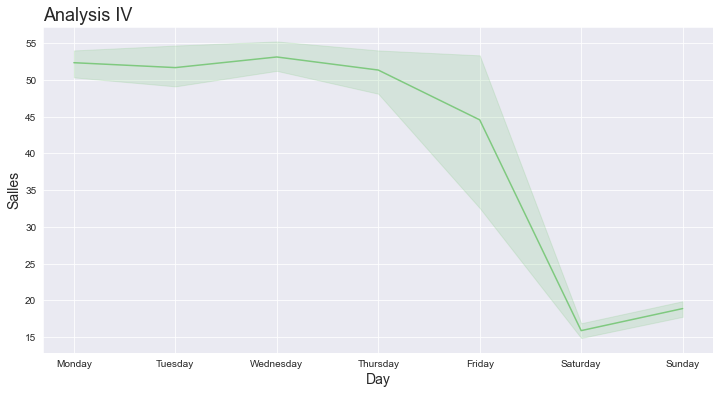

In [353]:
cy3 = ploting('Analysis IV', 'Day', 'Salles', 'day_of_the_week', 'vendas', daily)

In [354]:
daily.sample(10)

,dia,vendas,increase,acceleration,day_of_the_week
10,2018-10-11,40,-16.0,-19.0,Thursday
11,2018-10-12,15,-25.0,-9.0,Friday
28,2018-10-29,55,35.0,33.0,Monday
45,2018-11-15,57,5.0,3.0,Thursday
53,2018-11-23,53,-2.0,-7.0,Friday
27,2018-10-28,20,2.0,35.0,Sunday
49,2018-11-19,55,37.0,35.0,Monday
46,2018-11-16,58,1.0,-4.0,Friday
13,2018-10-14,17,3.0,4.0,Sunday
31,2018-11-01,56,5.0,3.0,Thursday


In [355]:
daily.head(10)

,dia,vendas,increase,acceleration,day_of_the_week
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday
7,2018-10-08,50,30.0,28.0,Monday
8,2018-10-09,53,3.0,-27.0,Tuesday
9,2018-10-10,56,3.0,0.0,Wednesday


In [356]:
daily_sells = daily.groupby('day_of_the_week')['vendas','increase','acceleration'].mean().round()

/var/folders/0h/x896y6yn107gp3wxmw7g6rk80000gp/T/ipykernel_18616/58592847.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  daily_sells = daily.groupby('day_of_the_week')['vendas','increase','acceleration'].mean().round()


In [357]:
daily_sells.head(7)

,vendas,increase,acceleration
day_of_the_week,,,
Friday,45.0,-7.0,-5.0
Monday,52.0,34.0,31.0
Saturday,16.0,-28.0,-20.0
Sunday,19.0,3.0,31.0
Thursday,51.0,-2.0,-3.0
Tuesday,52.0,-1.0,-34.0
Wednesday,53.0,1.0,2.0


In [358]:
# Daily sells analysis using autocorrelation_plot

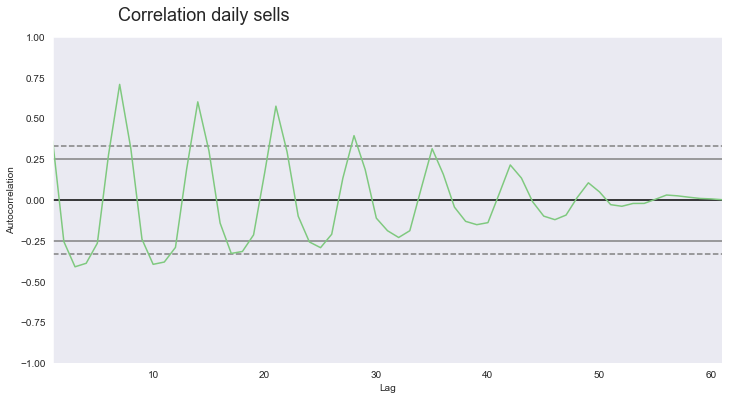

In [359]:
dy = plt.figure(figsize=(12,6))
dy.suptitle('Correlation daily sells', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(daily['vendas'])
dy = dy

In [360]:
# Incriasing analysis using autocorrelation_plot

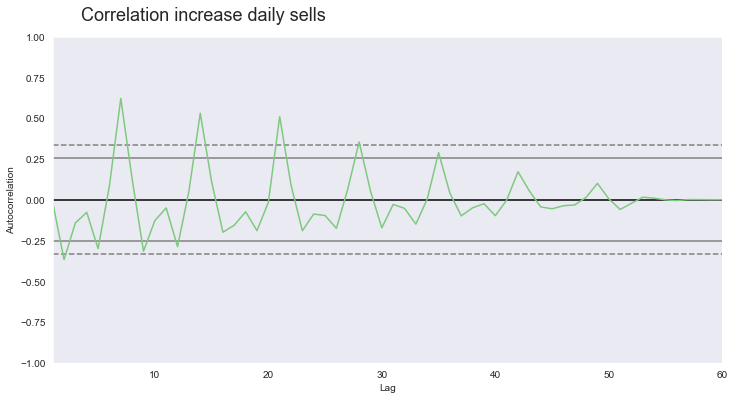

In [363]:
ey = plt.figure(figsize=(12,6))
ey.suptitle('Correlation increase daily sells', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(daily['increase'][1:]) #this [1:] sets the initial index, if start at 0, it won't work
ey = ey

In [364]:
# Acceleration analysis using autocorrelation_plot

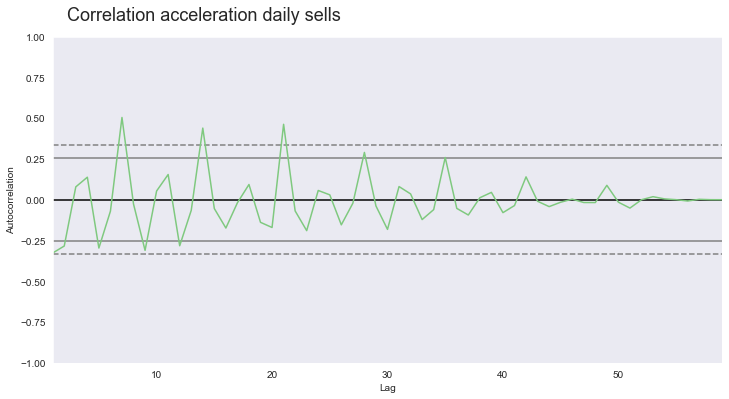

In [365]:
fy = plt.figure(figsize=(12,6))
fy.suptitle('Correlation acceleration daily sells', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(daily['acceleration'][2:]) #this [2:] sets the initial index, if start at 0, it won't work
fy = fy

In [366]:
# there is a relation between the days of the week and the sells (lag means a space of time) 

# Analysis for a coffee shop

In [367]:
cafelure = pd.read_csv('Data/cafelura.csv', sep = ',')

In [368]:
cafelure.head(3)

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240


In [369]:
cafelure.dtypes

mes       object
vendas     int64
dtype: object

In [370]:
cafelure['mes'] = pd.to_datetime(cafelure['mes'])

In [371]:
cafelure.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [373]:
print('The number os rows and columns is:', cafelure.shape)

The number os rows and columns is: (24, 2)


In [374]:
print('The number of NaN values is:', cafelure.isna().sum().sum()) 

The number of NaN values is: 0


In [375]:
# Analyzing the sells of 2017 and 2018:

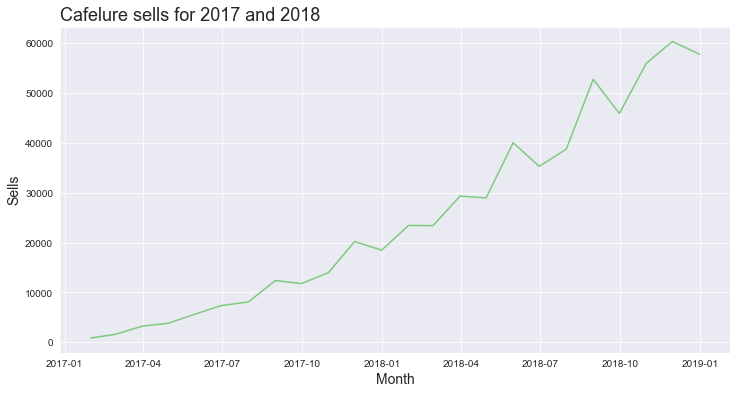

In [377]:
gy = ploting('Cafelure sells for 2017 and 2018', 'Month', 'Sells', 'mes', 'vendas', cafelure)

In [378]:
weekends = pd.read_csv('Data/dias_final_de_semana.csv', sep = ',') 

In [379]:
weekends.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [ ]:
# weekend days per month

In [380]:
weekends['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [381]:
cafelure['normalization of sells'] = cafelure['vendas'] / weekends['quantidade_de_dias'].values

In [382]:
cafelure.head()

,mes,vendas,normalization of sells
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


In [383]:
# the normalization consist in taking the sales and divide that per number of days of the weekend

In [384]:
# ploting the normalization of sells:

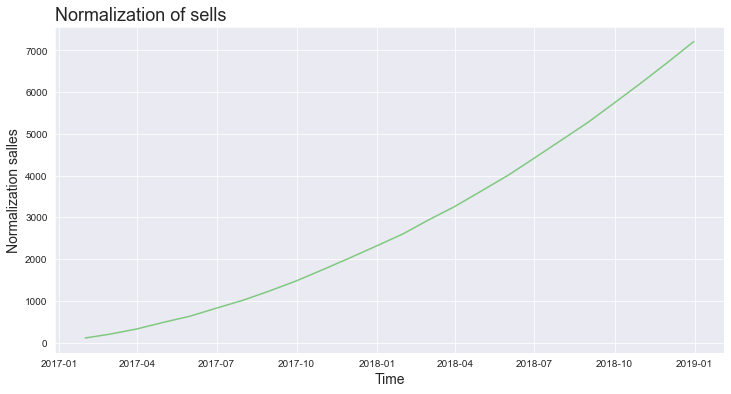

In [385]:
hy = ploting('Normalization of sells', 'Time', 'Normalization salles', 'mes', 'normalization of sells', cafelure)

# Statsmodel 

In [389]:
# importing seasonal models:


In [402]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [403]:
result = seasonal_decompose([chocolura['vendas']], freq=1)
gx = result.plot()

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

# TimeSeries noise

In [404]:
alucel = pd.read_csv('Data/alucel.csv', sep =',')

In [405]:
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [406]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [407]:
alucel['dia'] = pd.to_datetime(alucel['dia'])

In [408]:
print('The number or rows and columns is:', alucel.shape)

The number or rows and columns is: (61, 2)


In [409]:
print('The number of NaN is:',alucel.isna().sum().sum())

The number of NaN is: 0


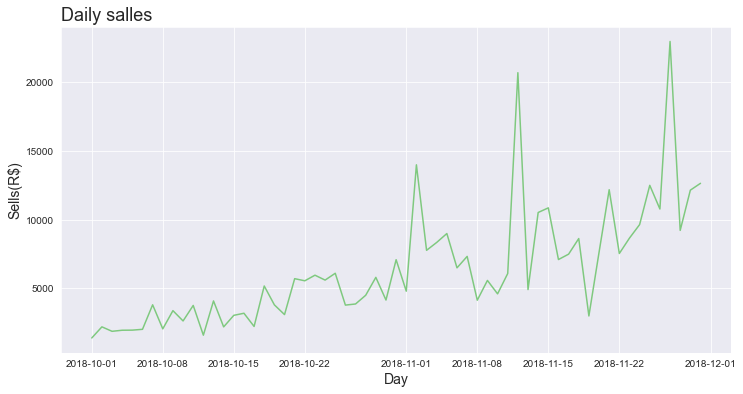

In [410]:
hy = ploting('Daily salles', 'Day', 'Sells(R$)', 'dia', 'vendas', alucel)

In [411]:
alucel['increase'] = alucel['vendas'].diff()

In [412]:
alucel['acceleration'] = alucel['increase'].diff()

In [413]:
alucel.head()

,dia,vendas,increase,acceleration
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


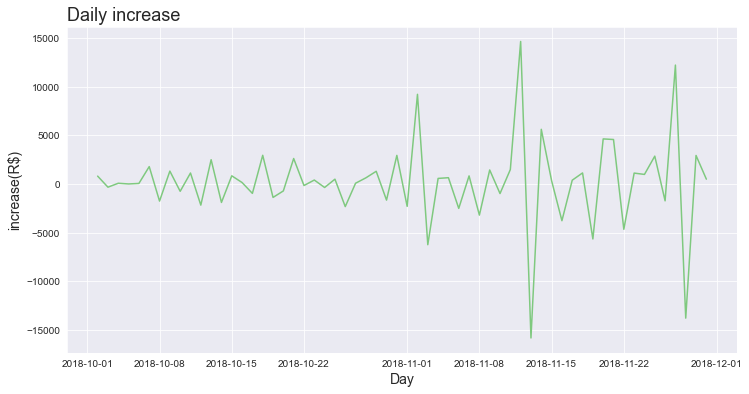

In [414]:
iy = ploting('Daily increase', 'Day', 'increase(R$)', 'dia', 'increase', alucel)

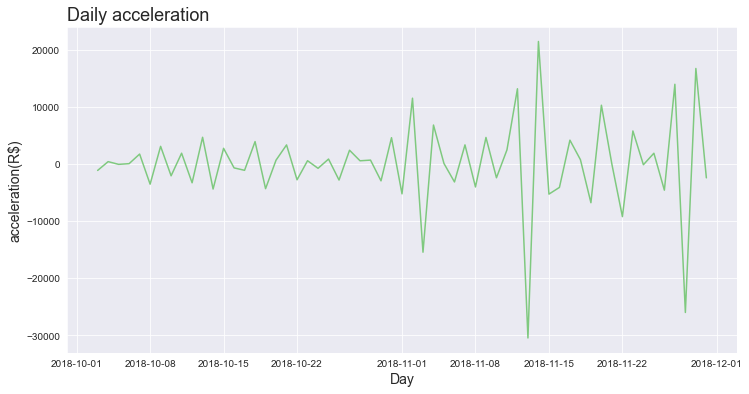

In [415]:
gy = ploting('Daily acceleration', 'Day', 'acceleration(R$)', 'dia', 'acceleration', alucel)

In [416]:
# the graphics have a lot of 'noise' with high frequency, we need to 'fix'that in order to obtain better results

In [417]:
# we use moving average to 'normilize' the noise 

In [418]:
#calculation the moving average:
alucel['moving_average'] = alucel['vendas'].rolling(7).mean() # the rolling(7) the 7 is the number of days of the week we want to
#analyze. 

In [419]:
alucel.head(14)

,dia,vendas,increase,acceleration,moving_average
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


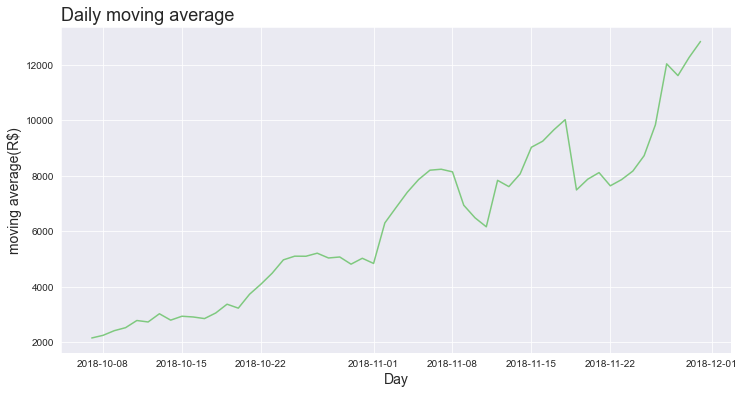

In [420]:
jy = ploting('Daily moving average', 'Day', 'moving average(R$)', 'dia', 'moving_average', alucel)

In [421]:
# calculating the moving average for a bigger period of time, 21 days:

In [422]:
alucel['moving_average_21'] = alucel['vendas'].rolling(21).mean()

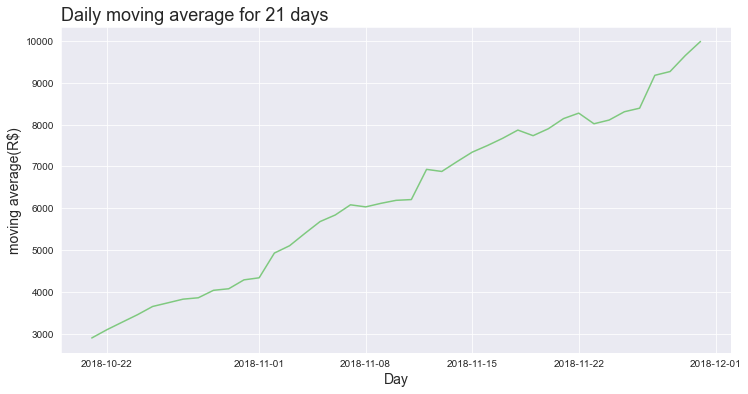

In [423]:
jy = ploting('Daily moving average for 21 days', 'Day', 'moving average(R$)', 'dia', 'moving_average_21', alucel)